### Prepare initial temperature and salinity input files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate
%matplotlib inline
import seawater as sw

In [2]:
def iniTracer(xsize, ysize, IniDepth, IniProfile, InterpDepth):
    '''Interpolate tracer profile into the vertical grid we will use for MITgcm.'''
    ft = scipy.interpolate.interp1d(IniDepth, IniProfile, kind='linear')
    InterpProfile = ft(InterpDepth)
    
    tracer = np.zeros((xsize, ysize, len(InterpDepth)))
    
    for kk in np.arange(len(InterpDepth)):
        tracer[:,:,kk] = np.ones((xsize,ysize))*InterpProfile[kk] 

    return tracer

In [3]:
dt = np.dtype('>f8')  # float 64 big endian

nx = 512#448
ny = 612#512
nz = 100 # 96 #36, 46

depth_CASE = np.array([-2, -5, -15, -25, -35, -45, -55, -65, -75, -85, -95, -105, -115, -125, -135, -145, -155, -165, -175, 
              -186.25, -201.25,-220., -240, -260, -280, -300, -320, -300, -320, -340, -360, -380, -400, -420, 
              -440, -460, -480,-507.5,-550.,-600, -650, -700, -750, -800, -850, -900, -950, -1012.5, -1100, 
              -1200, -1300,-14000, -1500, -1600, -1700, -1800, -1900, -2012.5,-2162.5, -2350, -2550, -2750, -2950,
              -3150, -3350, -3550.,-3750.,-3950.,-4150.,-4350.,-4550.,-4750.,-4950.,-5150.,-5350.])

model_depth_3 = [-10.0,-20.0,-30.0,-40.0,-50.0,-60.0,-70.0,-80.0,-90.0,-100.0,
                 -110.0,-120.0,-130.0,-140.0,-150.0,-160.0,-170.0,-180.0,-190.0,-200.0,
                 -210.0,-220.0,-230.0,-240.0,-250.0,-260.0,-270.0,-280.0,-290.0,-300.0,
                 -312.5,-325.0,-340.0,-355.0,-372.5,-390.0,-410.0,-430.0,-450.0,-470.0,
                 -490.0,-510.0,-530.0,-550.0,-575.0,-600.0,-630.0,-665.0,-705.0,-750.0,
                 -800.0,-850.0,-900.0,-950.0,-1000.0,-1050.0,-1100.0,-1150.0,-1200.0,-1250.0,
                 -1300.0,-1350.0,-1400.0,-1450.0,-1500.0,-1550.0,-1625.0,-1700.0,-1800.0,-1900.0,
                 -2000.0,-2100.0,-2200.0,-2300.0,-2400.0,-2500.0,-2600.0,-2700.0,-2800.0,-2900.0,
                 -3000.0,-3100.0,-3200.0,-3300.0,-3400.0,-3500.0,-3600.0,-3700.0,-3800.0,-3900.0,
                 -4000.0,-4100.0,-4200.0,-4300.0,-4400.0,-4500.0]
model_depth_4 = -1*np.array([2.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
               1.0000e+01, 1.2200e+01, 1.4600e+01, 1.7200e+01, 2.0000e+01,
               2.3000e+01, 2.6200e+01, 2.9700e+01, 3.3500e+01, 3.7700e+01,
               4.2200e+01, 4.7000e+01, 5.2000e+01, 5.7000e+01, 6.2000e+01,
               6.7000e+01, 7.2000e+01, 7.7000e+01, 8.2500e+01, 8.8000e+01,
               9.3500e+01, 9.9000e+01, 1.0450e+02, 1.1050e+02, 1.1700e+02,
               1.2400e+02, 1.3150e+02, 1.3950e+02, 1.4800e+02, 1.5720e+02,
               1.6720e+02, 1.7720e+02, 1.8720e+02, 1.9720e+02, 2.0720e+02,
               2.1720e+02, 2.2720e+02, 2.3820e+02, 2.5020e+02, 2.6320e+02,
               2.7720e+02, 2.9220e+02, 3.0820e+02, 3.2520e+02, 3.4320e+02,
               3.6320e+02, 3.8520e+02, 4.0820e+02, 4.3320e+02, 4.5820e+02,
               4.8320e+02, 5.0820e+02, 5.3320e+02, 5.5820e+02, 5.8320e+02,
               6.0820e+02, 6.3520e+02, 6.6320e+02, 6.9320e+02, 7.2320e+02,
               7.5520e+02, 7.8920e+02, 8.2520e+02, 8.6320e+02, 9.0320e+02,
               9.4620e+02, 9.9220e+02, 1.0422e+03, 1.0972e+03, 1.1562e+03,
               1.2212e+03, 1.2912e+03, 1.3662e+03, 1.4462e+03, 1.5312e+03,
               1.6232e+03, 1.7232e+03, 1.8232e+03, 1.9232e+03, 2.0232e+03,
               2.1232e+03, 2.2232e+03, 2.3282e+03, 2.4432e+03, 2.5682e+03,
               2.7002e+03, 2.8452e+03, 3.0052e+03, 3.1752e+03, 3.3552e+03,
               3.5452e+03, 3.7452e+03, 3.9552e+03, 4.1852e+03, 4.4302e+03,
               4.7000e+03])
print(model_depth_4, np.shape(model_depth_4))

[-2.0000e+00 -4.0000e+00 -6.0000e+00 -8.0000e+00 -1.0000e+01 -1.2200e+01
 -1.4600e+01 -1.7200e+01 -2.0000e+01 -2.3000e+01 -2.6200e+01 -2.9700e+01
 -3.3500e+01 -3.7700e+01 -4.2200e+01 -4.7000e+01 -5.2000e+01 -5.7000e+01
 -6.2000e+01 -6.7000e+01 -7.2000e+01 -7.7000e+01 -8.2500e+01 -8.8000e+01
 -9.3500e+01 -9.9000e+01 -1.0450e+02 -1.1050e+02 -1.1700e+02 -1.2400e+02
 -1.3150e+02 -1.3950e+02 -1.4800e+02 -1.5720e+02 -1.6720e+02 -1.7720e+02
 -1.8720e+02 -1.9720e+02 -2.0720e+02 -2.1720e+02 -2.2720e+02 -2.3820e+02
 -2.5020e+02 -2.6320e+02 -2.7720e+02 -2.9220e+02 -3.0820e+02 -3.2520e+02
 -3.4320e+02 -3.6320e+02 -3.8520e+02 -4.0820e+02 -4.3320e+02 -4.5820e+02
 -4.8320e+02 -5.0820e+02 -5.3320e+02 -5.5820e+02 -5.8320e+02 -6.0820e+02
 -6.3520e+02 -6.6320e+02 -6.9320e+02 -7.2320e+02 -7.5520e+02 -7.8920e+02
 -8.2520e+02 -8.6320e+02 -9.0320e+02 -9.4620e+02 -9.9220e+02 -1.0422e+03
 -1.0972e+03 -1.1562e+03 -1.2212e+03 -1.2912e+03 -1.3662e+03 -1.4462e+03
 -1.5312e+03 -1.6232e+03 -1.7232e+03 -1.8232e+03 -1

In [4]:
# CASE-STSE profiles (taken from T_and_S_SVB_CASE_STSE_500m.ipynb), I added values 
# at the end to remove nans

winter_T = np.array([15.64281346, 15.64281346, 15.60289402, 15.57966908, 15.54019553, 15.22524845, 14.42350367, 
            13.41403619, 12.44038533, 11.63659622, 11.03686541, 10.61079702, 10.3023444,
            10.07461855,  9.90947987,  9.78946277,  9.69587795,  9.6124073,   9.52210283,
            9.39556335 ,  9.20935704,  8.94435004,  8.66005842,  8.3693974,   8.13485792,
            7.92375061 ,  7.72229653,  7.5276444,   7.35123369,  7.19681854,  7.05827469,
            6.90917556 ,  6.75888495,  6.61553192,  6.47093592, 6.29434722,  6.06129913,
            5.78660877 ,  5.50230797,  5.2463474,   5.02591273,  4.8161574,   4.59910526,
            4.3870443  ,  4.3870443,   4.3870443,   4.3870443,   4.3870443,   4.3870443  , 
            4.3870443,   4.3870443,    4.3870443,   4.3870443,   4.3870443,   4.3870443,
             4.3870443,  4.3870443,    4.3870443,   4.3870443,   4.3870443,   4.3870443, 
            4.3870443,   4.3870443,    4.3870443,   4.3870443,   4.3870443,   4.3870443,
            4.3870443,   4.3870443,     4.3870443,  4.3870443,   4.3870443,   4.3870443, 
            4.3870443,   4.3870443])

winter_S = np.array([33.72671579,33.72671579, 33.72580439, 33.72524128, 33.72380219, 33.71469536, 33.7178744,
            33.74111602, 33.77706439, 33.81456706, 33.84850095, 33.87990354, 33.91042353,
            33.93981635, 33.96659209,33.98992545, 34.00984713, 34.02757994, 34.04465892,
            34.06333771, 34.08289452, 34.10208073, 34.11792386, 34.13317839, 34.14734554,
            34.16171385, 34.17872575, 34.19707597, 34.21581198, 34.23410282, 34.25084947,
            34.26659819, 34.28188705, 34.29635544, 34.31013546, 34.32523886, 34.34358762,
            34.36381226, 34.38410168, 34.40277398, 34.41914399, 34.43471127, 34.45136038,
            34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149,        
            34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 
            34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 
            34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 
            34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149, 34.46755149,
            34.46755149, 34.46755149])
            

summer_T = [21.28064765,21.28064765, 20.54828542, 18.55534178, 16.43902679, 14.76547343, 13.64015505,
            12.8393429,  12.22211745, 11.71393882, 11.28601574, 10.94156853, 10.68772411,
             10.51033494, 10.35834875, 10.22669735, 10.11560694, 10.01734837,  9.92279022,
              9.80560143,  9.65525046,  9.47520062,  9.30545528,  9.0317656,   8.75696304,
            8.52454602,  8.32573475,  8.13693523,  7.93757538,  7.71142255,  7.49431965,
              7.25881002,  7.03025287,  6.83254114,  6.6567402,   6.45129624,  6.20476696,
              5.92122908,  5.61136647,  5.30830995,  5.03894987,  4.80284899,  4.57949612,
              4.35205313,  4.35205313,  4.35205313 ,  4.35205313,  4.35205313, 4.35205313,        
              4.35205313,  4.35205313,  4.35205313,   4.35205313,  4.35205313, 4.35205313,       
             4.35205313,   4.35205313,  4.35205313,   4.35205313,  4.35205313, 4.35205313,
            4.35205313,  4.35205313,  4.35205313,   4.35205313,    4.35205313,  4.35205313,
           4.35205313,   4.35205313,  4.35205313,    4.35205313,   4.35205313,  4.35205313,
           4.35205313, 4.35205313,]

summer_S = [33.75910156,33.75910156, 33.73825602, 33.69384341, 33.66786581, 33.66636479, 33.68452897,
             33.72044409, 33.76858896, 33.82208953, 33.87374447, 33.91712521, 33.94939669,
             33.97149184, 33.98970967, 34.00845521, 34.02603992, 34.04069421, 34.05394868,
             34.07109685, 34.09629102, 34.1297117 , 34.15567896, 34.18133674, 34.19568357,
             34.20437905, 34.21403626, 34.22403366, 34.23837286, 34.25297534, 34.26430241,
             34.27469801, 34.28467855, 34.2945313,  34.30487091, 34.31977524, 34.33887174,
             34.35871672, 34.37750281, 34.39501972, 34.41142427, 34.4270289 , 34.44333673,
             34.46185906,  34.46185906, 34.46185906, 34.46185906, 34.46185906  ,34.46185906,
             34.46185906,  34.46185906, 34.46185906,  34.46185906,  34.46185906, 34.46185906,
         34.46185906,    34.46185906,   34.46185906,  34.46185906, 34.46185906,   34.46185906,
         34.46185906,  34.46185906,    34.46185906,  34.46185906,  34.46185906,  34.46185906,
        34.46185906,      34.46185906,      34.46185906,  34.46185906,  34.46185906,  34.46185906,
        34.46185906, 34.46185906 ]

feb_T = [16.05,16.04,16.03,16.02,16.00,15.99,15.98,15.96,15.94,15.91,15.89,15.84,15.79,15.73,15.64,
         15.55,15.40,15.25,15.00,14.75,14.40,14.05,13.68,13.29,12.95,12.61,12.30,11.99,11.67,11.33,
         10.99,10.67,10.36,10.06,9.81,9.60,9.42,9.26,9.11,9.00,8.88,8.77,8.66,8.54,8.43,8.31,8.18,
         8.03,7.86,7.68,7.49,7.30,7.11,6.92,6.73,6.55,6.37,6.19,6.01,5.84,5.66,5.48,5.30,5.12,4.96,
         4.80,4.64,4.49,4.34,4.19,4.04,3.88,3.73,3.57,3.40,3.23,3.07,2.91,2.75,2.61,2.47,2.32,2.18,
         2.06,2.00,1.96,1.92,1.88,1.83,1.78,1.73,1.67,1.63,1.59,1.54,1.50,1.46,1.43,1.39,1.49]

feb_S = [33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.53,33.53,33.53,
         33.53,33.54,33.54,33.54,33.55,33.55,33.56,33.56,33.57,33.58,33.60,33.61,33.63,33.64,33.67,
         33.69,33.71,33.74,33.77,33.81,33.84,33.88,33.91,33.95,33.98,34.01,34.04,34.07,34.11,34.14,
         34.17,34.20,34.22,34.23,34.24,34.25,34.26,34.28,34.29,34.31,34.32,34.33,34.35,34.36,34.37,
         34.38,34.39,34.40,34.41,34.42,34.43,34.44,34.45,34.46,34.47,34.48,34.49,34.50,34.51,34.52,
         34.53,34.54,34.56,34.57,34.58,34.59,34.61,34.62,34.63,34.64,34.65,34.66,34.67,34.68,34.68,
         34.68,34.68,34.68,34.69,34.69,34.70,34.70,34.71,34.71,34.69]
aug_T = [21.31,21.30,21.28,21.27,21.25,21.24,21.22,21.13,20.91,20.67,20.41,19.84,19.18,18.45,17.64,
         16.78,16.10,15.42,14.87,14.32,13.87,13.43,13.04,12.63,12.28,11.94,11.64,11.34,11.04,10.73,
         10.43,10.18,9.95,9.74,9.54,9.37,9.22,9.08,8.95,8.85,8.76,8.67,8.57,8.46,8.33,8.19,8.04,7.88,
         7.72,7.55,7.38,7.19,7.02,6.84,6.67,6.49,6.33,6.18,6.03,5.89,5.75,5.61,5.46,5.31,5.16,5.00,4.84,
         4.68,4.52,4.37,4.23,4.09,3.94,3.79,3.62,3.46,3.29,3.12,2.94,2.79,2.65,2.50,2.35,2.20,2.09,2.02,
         1.95,1.88,1.81,1.75,1.68,1.61,1.57,1.53,1.50,1.47,1.44,1.40,1.38,1.48]
aug_S = [33.71,33.71,33.70,33.70,33.70,33.70,33.70,33.69,33.68,33.66,33.64,33.61,33.59,33.56,33.55,33.54,
         33.54,33.54,33.54,33.55,33.56,33.57,33.59,33.60,33.63,33.65,33.68,33.71,33.74,33.78,33.81,33.85,
         33.89,33.92,33.96,33.99,34.03,34.07,34.10,34.12,34.15,34.16,34.18,34.20,34.21,34.23,34.24,34.25,
         34.25,34.26,34.27,34.28,34.29,34.31,34.33,34.35,34.36,34.37,34.38,34.40,34.40,34.41,34.42,34.42,
         34.43,34.44,34.44,34.45,34.46,34.47,34.48,34.49,34.49,34.50,34.52,34.53,34.54,34.55,34.56,34.57,
         34.58,34.59,34.60,34.61,34.62,34.63,34.65,34.66,34.67,34.68,34.68,34.68,34.68,34.69,34.69,34.70,
         34.70,34.71,34.72,34.69]

33.727,33.727,33.727,33.726,33.726,33.726,33.726,33.726,33.726,33.725,33.725,33.725,33.724,33.721,33.717,33.715,33.717,33.723,33.734,33.748,33.766,33.785,33.805,33.825,33.843,33.861,33.878,33.897,33.916,33.937,33.957,33.977,33.996,34.014,34.031,34.048,34.065,34.078,34.089,34.099,34.108,34.116,34.126,34.135,34.145,34.178,34.184,34.193,34.237,34.253,34.271,34.288,34.305,34.324,34.346,34.364,34.376,34.387,34.397,34.405,34.414,34.423,34.433,34.442,34.453,34.464,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,34.468,

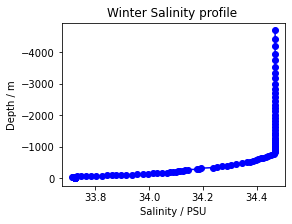

In [5]:
s_winter = iniTracer(nx,ny,depth_CASE,winter_S,model_depth_4)
Sal_win = np.round(s_winter, 3)

# Save binary file
tmpfile = "%dx%dx%d/winter_sal_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Sal2 = Sal_win.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
Sal2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(Sal_win[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Salinity / PSU')
plt.ylabel('Depth / m')
    
plt.title('Winter Salinity profile ')

for tt in Sal_win[20,45,:]:
    print(tt, end=",")

15.643,15.643,15.639,15.631,15.623,15.614,15.604,15.598,15.591,15.584,15.575,15.561,15.546,15.455,15.313,15.065,14.664,14.222,13.717,13.219,12.732,12.28,11.838,11.457,11.127,10.866,10.632,10.441,10.257,10.097,9.967,9.855,9.761,9.678,9.593,9.497,9.384,9.26,9.125,8.984,8.842,8.686,8.512,8.332,8.168,7.764,7.689,7.586,7.175,7.034,6.87,6.7,6.52,6.31,6.029,5.782,5.615,5.46,5.332,5.21,5.091,4.971,4.845,4.715,4.577,4.433,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,4.387,

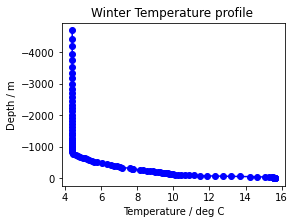

In [6]:
T_winter = iniTracer(nx,ny,depth_CASE,winter_T,model_depth_4)
temp_win = np.round(T_winter, 3)
# Save binary file
tmpfile = "%dx%dx%d/winter_temp_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
temp2 = temp_win.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
temp2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(temp_win[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Winter Temperature profile ')

for tt in temp_win[20,45,:]:
    print(tt, end=",")

33.759,33.759,33.757,33.753,33.749,33.744,33.739,33.728,33.716,33.703,33.691,33.682,33.672,33.667,33.667,33.67,33.679,33.692,33.71,33.73,33.754,33.779,33.809,33.838,33.866,33.891,33.915,33.935,33.954,33.969,33.983,33.998,34.014,34.029,34.044,34.057,34.073,34.089,34.107,34.125,34.139,34.153,34.169,34.184,34.194,34.213,34.218,34.224,34.255,34.266,34.277,34.289,34.301,34.318,34.341,34.359,34.37,34.38,34.389,34.398,34.407,34.416,34.425,34.435,34.445,34.458,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,34.462,

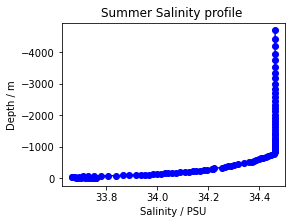

In [7]:
s_summer = iniTracer(nx,ny,depth_CASE,summer_S,model_depth_4)
Sal_sum = np.round(s_summer, 3)
# Save binary file
tmpfile = "%dx%dx%d/summer_sal_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Sal2 = Sal_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
Sal2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(Sal_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Salinity / PSU')
plt.ylabel('Depth / m')
    
plt.title('Summer Salinity profile ')

for tt in Sal_sum[20,45,:]:
    print(tt, end=",")

21.281,21.281,21.207,21.061,20.914,20.753,20.578,20.11,19.552,18.954,18.301,17.561,16.756,15.987,15.234,14.54,13.978,13.48,13.08,12.716,12.407,12.12,11.841,11.586,11.35,11.148,10.959,10.802,10.652,10.528,10.412,10.299,10.193,10.094,9.997,9.9,9.796,9.696,9.598,9.502,9.414,9.321,9.166,8.988,8.795,8.379,8.284,8.166,7.677,7.457,7.199,6.949,6.717,6.47,6.172,5.916,5.734,5.562,5.41,5.264,5.119,4.977,4.835,4.699,4.556,4.401,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,4.352,

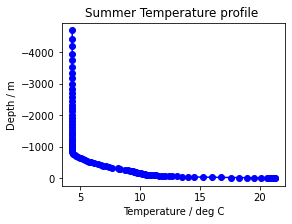

In [8]:
t_summer = iniTracer(nx,ny,depth_CASE,summer_T,model_depth_4)
temp_sum = np.round(t_summer, 3)
# Save binary file
tmpfile = "%dx%dx%d/summer_temp_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
temp2 = temp_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
temp2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(temp_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Summer Temperature profile ')

for tt in temp_sum[20,45,:]:
    print(tt, end=",")

16.05,16.04,16.03,16.02,16.0,15.99,15.98,15.96,15.94,15.91,15.89,15.84,15.79,15.73,15.64,15.55,15.4,15.25,15.0,14.75,14.4,14.05,13.68,13.29,12.95,12.61,12.3,11.99,11.67,11.33,10.99,10.67,10.36,10.06,9.81,9.6,9.42,9.26,9.11,9.0,8.88,8.77,8.66,8.54,8.43,8.31,8.18,8.03,7.86,7.68,7.49,7.3,7.11,6.92,6.73,6.55,6.37,6.19,6.01,5.84,5.66,5.48,5.3,5.12,4.96,4.8,4.64,4.49,4.34,4.19,4.04,3.88,3.73,3.57,3.4,3.23,3.07,2.91,2.75,2.61,2.47,2.32,2.18,2.06,2.0,1.96,1.92,1.88,1.83,1.78,1.73,1.67,1.63,1.59,1.54,1.5,1.46,1.43,1.39,1.49,

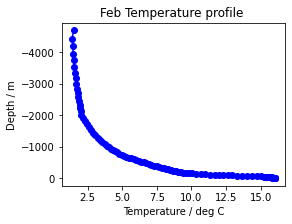

In [9]:
t_feb = iniTracer(nx,ny,model_depth_4,feb_T,model_depth_4)
temp_sum = np.round(t_feb, 3)
# Save binary file
tmpfile = "%dx%dx%d/feb_Tref_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
temp2 = temp_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
temp2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(temp_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Feb Temperature profile ')

for tt in temp_sum[20,45,:]:
    print(tt, end=",")

33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.52,33.53,33.53,33.53,33.53,33.54,33.54,33.54,33.55,33.55,33.56,33.56,33.57,33.58,33.6,33.61,33.63,33.64,33.67,33.69,33.71,33.74,33.77,33.81,33.84,33.88,33.91,33.95,33.98,34.01,34.04,34.07,34.11,34.14,34.17,34.2,34.22,34.23,34.24,34.25,34.26,34.28,34.29,34.31,34.32,34.33,34.35,34.36,34.37,34.38,34.39,34.4,34.41,34.42,34.43,34.44,34.45,34.46,34.47,34.48,34.49,34.5,34.51,34.52,34.53,34.54,34.56,34.57,34.58,34.59,34.61,34.62,34.63,34.64,34.65,34.66,34.67,34.68,34.68,34.68,34.68,34.68,34.69,34.69,34.7,34.7,34.71,34.71,34.69,

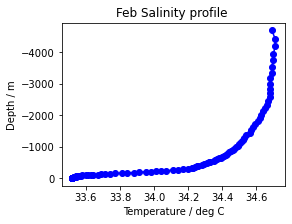

In [10]:
s_feb = iniTracer(nx,ny,model_depth_4,feb_S,model_depth_4)
sal_sum = np.round(s_feb, 3)
# Save binary file
tmpfile = "%dx%dx%d/feb_Sref_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
sal2 = sal_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
sal2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(sal_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Feb Salinity profile ')

for tt in sal_sum[20,45,:]:
    print(tt, end=",")

21.31,21.3,21.28,21.27,21.25,21.24,21.22,21.13,20.91,20.67,20.41,19.84,19.18,18.45,17.64,16.78,16.1,15.42,14.87,14.32,13.87,13.43,13.04,12.63,12.28,11.94,11.64,11.34,11.04,10.73,10.43,10.18,9.95,9.74,9.54,9.37,9.22,9.08,8.95,8.85,8.76,8.67,8.57,8.46,8.33,8.19,8.04,7.88,7.72,7.55,7.38,7.19,7.02,6.84,6.67,6.49,6.33,6.18,6.03,5.89,5.75,5.61,5.46,5.31,5.16,5.0,4.84,4.68,4.52,4.37,4.23,4.09,3.94,3.79,3.62,3.46,3.29,3.12,2.94,2.79,2.65,2.5,2.35,2.2,2.09,2.02,1.95,1.88,1.81,1.75,1.68,1.61,1.57,1.53,1.5,1.47,1.44,1.4,1.38,1.48,

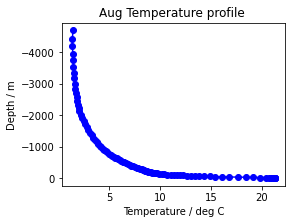

In [11]:
t_aug = iniTracer(nx,ny,model_depth_4,aug_T,model_depth_4)
temp_sum = np.round(t_aug, 3)
# Save binary file
tmpfile = "%dx%dx%d/aug_Tref_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
temp2 = temp_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
temp2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(temp_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Aug Temperature profile ')

for tt in temp_sum[20,45,:]:
    print(tt, end=",")

33.71,33.71,33.7,33.7,33.7,33.7,33.7,33.69,33.68,33.66,33.64,33.61,33.59,33.56,33.55,33.54,33.54,33.54,33.54,33.55,33.56,33.57,33.59,33.6,33.63,33.65,33.68,33.71,33.74,33.78,33.81,33.85,33.89,33.92,33.96,33.99,34.03,34.07,34.1,34.12,34.15,34.16,34.18,34.2,34.21,34.23,34.24,34.25,34.25,34.26,34.27,34.28,34.29,34.31,34.33,34.35,34.36,34.37,34.38,34.4,34.4,34.41,34.42,34.42,34.43,34.44,34.44,34.45,34.46,34.47,34.48,34.49,34.49,34.5,34.52,34.53,34.54,34.55,34.56,34.57,34.58,34.59,34.6,34.61,34.62,34.63,34.65,34.66,34.67,34.68,34.68,34.68,34.68,34.69,34.69,34.7,34.7,34.71,34.72,34.69,

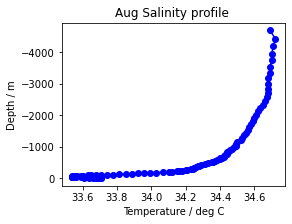

In [12]:
s_aug = iniTracer(nx,ny,model_depth_4,aug_S,model_depth_4)
sal_sum = np.round(s_aug, 3)
# Save binary file
tmpfile = "%dx%dx%d/aug_Sref_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
sal2 = sal_sum.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
sal2.astype(dt).tofile(fileobj,"")
fileobj.close()

# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))

ax.plot(np.squeeze(sal_sum[20,45,:]),model_depth_4,'bo-')

ax.invert_yaxis()
    
plt.xlabel('Temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Aug Salinity profile ')

for tt in sal_sum[20,45,:]:
    print(tt, end=",")

<ipython-input-13-ef1dac67db32>:15: RuntimeWarning: invalid value encountered in sqrt
  ax2.plot(np.sqrt(N2_sum),-pave_sum,'-o', color='orange', label='summer')


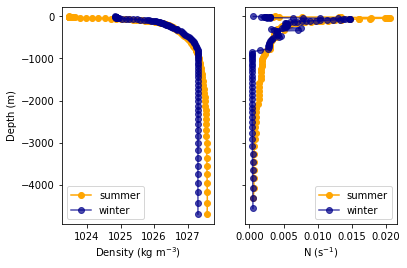

In [13]:
pden_sum = sw.pden(Sal_sum[20,45,:],temp_sum[20,45,:],model_depth_4)
pden_win = sw.pden(Sal_win[20,45,:],temp_win[20,45,:],model_depth_4)

N2_sum,q,pave_sum  = sw.bfrq(Sal_sum[20,45,:],temp_sum[20,45,:],-np.array(model_depth_4))
N2_win,q,pave_win  = sw.bfrq(Sal_win[20,45,:],temp_win[20,45,:],-np.array(model_depth_4))


fig,(ax,ax2) = plt.subplots(1,2,figsize=(6,4), sharey=True)
ax.plot(pden_sum,model_depth_4,'-o', color='orange', label='summer')
ax.plot(pden_win,model_depth_4,'-o', color='darkblue', label='winter' ,alpha=0.7)
ax.set_xlabel(r'Density (kg m$^{-3}$)')
ax.set_ylabel('Depth (m)')
ax.legend()

ax2.plot(np.sqrt(N2_sum),-pave_sum,'-o', color='orange', label='summer')
ax2.plot(np.sqrt(N2_win),-pave_win,'-o', color='darkblue', label='winter' ,alpha=0.7)
ax2.set_xlabel(r'N (s$^{-1}$)')
ax2.legend()
